# Installing Dependancies

In [1]:
from google.colab import drive
import sys

drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab/RRA_RL/"
sys.path.append("/content/gdrive/My Drive/Colab/RRA_RL/")

Mounted at /content/gdrive


In [2]:
pip install pyfolio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.7 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88650 sha256=051134e364033a97dca5542f8d33434be4052d4cf79258c224b9784e8c2fe1a8
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=f4c032ff2d0df8ebae3b17f9d00f9c284c7ced9cf40d19649580a6bc78b99b3b
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


In [3]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 758.6 kB/s eta 0:00:00


In [4]:
pip install Riskfolio-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 25.1 MB/s eta 0:00:00


# Preprocessing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime

In [6]:
import numpy as np
import math
import time

import gym
from gym.utils import seeding
from gym import spaces

import yfinance as yf

# Defining Hyperparameters

### Select the tickers and timeframe

In [7]:
tickers = ["AAPL", "GE", "JPM", "MSFT", "VOD", "NKE", "NVDA", "MMM"]

# Download historical data for the tickers
data_train = yf.download(tickers, start='2015-01-03', end='2017-01-04')['Adj Close']
data_test = yf.download(tickers, start='2017-01-05', end='2018-01-05')['Adj Close']
data_plot = pd.concat([data_train, data_test])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  8 of 8 completed


In [8]:
returns = data_train.pct_change()
market_data = yf.download('^GSPC', start='2016-01-03', end='2017-01-04')['Adj Close'].pct_change().dropna()  # compare with SP500

betas = {}  # calculate beta value and store it in dictionary
for t in tickers:
    cov = returns[t].cov(market_data)
    market_var = market_data.var()
    beta = cov/market_var
    betas[t] = beta

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[*********************100%%**********************]  1 of 1 completed


### Check if all tickers have the same number of data points

In [9]:
# sort the original pd data with beta (column ordered in ascending beta)
sorted_cols = sorted(data_train.columns, key=lambda x: betas.get(x, 0))
sorted_data_test = data_test[sorted_cols]
sorted_data_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MMM,NKE,GE,AAPL,VOD,MSFT,NVDA,JPM
Date,,,,,,,,
2017-01-05,138.322449,49.199795,174.721512,27.130730,16.236727,56.883068,25.071741,71.112595
2017-01-06,138.727142,49.987938,175.220398,27.433191,16.193512,57.376125,25.406893,71.120872
2017-01-09,137.979950,49.496502,174.388947,27.684464,15.792225,57.193512,26.436962,71.170441
2017-01-10,137.442886,49.246147,173.890045,27.712383,16.070040,57.175251,26.237352,71.376884
2017-01-11,138.462524,48.856689,174.444336,27.861294,16.372549,57.695690,25.914530,71.913681
...,...,...,...,...,...,...,...,...
2017-12-28,187.784012,59.149395,99.475121,40.443924,20.856846,80.014305,48.834721,90.546852
2017-12-29,187.505157,58.773552,99.990837,40.006565,20.837250,79.846283,47.869888,89.832832
2018-01-02,187.720291,59.656796,103.027802,40.722874,21.033215,80.228996,49.317116,90.681244


### Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


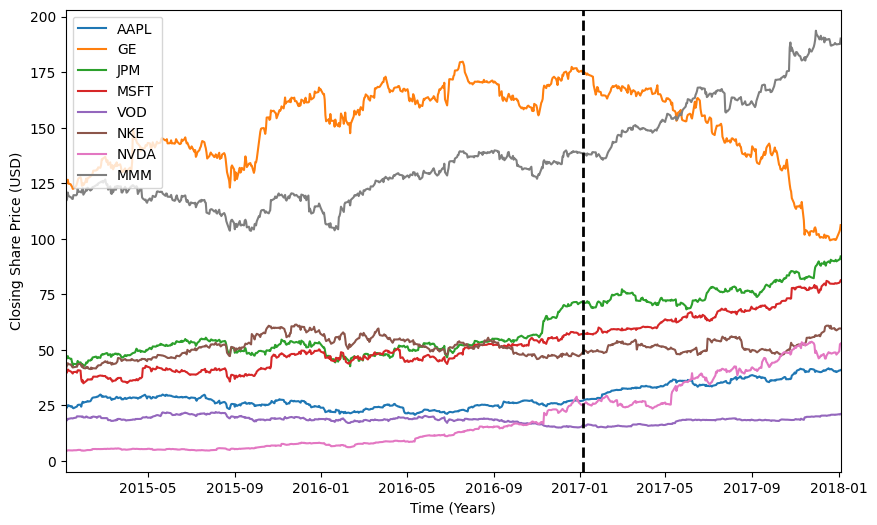

In [10]:
plt.rcParams["figure.figsize"] = (10,6)
for i in tickers:
    plt.plot(data_plot[i], label=i)

# only one line may be specified; full height
plt.axvline(pd.to_datetime('2017-01-05'), color='black', linestyle='--', lw=2)
plt.legend(loc='upper left')
plt.margins(x=0)
plt.ylabel("Closing Share Price (USD)")
plt.xlabel("Time (Years)")
plt.savefig('data0.png',bbox_inches='tight')

# Validating Results

In [11]:
import numpy as np
import random

In [12]:
rebalance_period = 1 #checking for balance (composition) everyday
test_re_df = sorted_data_test#.iloc[::rebalance_period, :]

In [13]:
length = test_re_df.shape[0] #number of data points in testing dataset
stocks = test_re_df.shape[1] #number of stocks/assets in dataset

In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import riskfolio as rp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
portfolio_weights_equal = np.ones([test_re_df.shape[0],test_re_df.shape[1]])/test_re_df.shape[1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
return_stocks = test_re_df.pct_change()
return_stocks_equal = np.sum(return_stocks.multiply(portfolio_weights_equal),axis=1)
Cumulative_returns_daily_equal = (1+return_stocks_equal).cumprod()

### Load $RRA-RL$ Policy Weights
### Calculate Cumulative Returns

In [18]:
def calculate_cumulative_return(allocation):
  cr = np.zeros((allocation.shape[0], allocation.shape[1]-1))
  for i in range(allocation.shape[0]):
    return_stocks_equal = np.sum(return_stocks.multiply(allocation[i][:-1]),axis=1)
    cumulative_returns = (1+return_stocks_equal).cumprod()
    cr[i,:] = cumulative_returns

  return cr

In [19]:
def calculate_simulation_mean(allocation):
  allo = np.empty((allocation.shape[0], allocation.shape[1], allocation.shape[-1]))
  for i in range(allo.shape[0]):
    allo[i, :] = np.mean(allocation[i], axis=1)
  return allo

In [20]:
# calculating the cumulative return for robustRL

# trained on EOU
allocation_data = np.load('/content/gdrive/MyDrive/Colab/RRA_RL/ex4/save075/wt_history.npy')
allocation075 = calculate_simulation_mean(allocation_data)

cumulative_returns_RobustRL_075 = calculate_cumulative_return(allocation075)

### Loading Real-Data Model

In [21]:
# trained on RealData
realData_bull = np.load('/content/gdrive/MyDrive/Colab/RRA_RL/ex5(v2)/save075/wt_history.npy')
allocationX075 = calculate_simulation_mean(realData_bull)

cumulative_returns_RobustRL_X075 = calculate_cumulative_return(allocationX075)

## Plotting all cumulative returns together



#### This is the best case run

### Loading Cumulative Returns for 5 RL Methods

In [22]:
bull_validation_dir = '/content/gdrive/MyDrive/Colab/RRA_RL/Validation_Data/Bull/CR/'

Cumulative_returns_daily_drl_a2c = np.load(bull_validation_dir + 'New_CR_five_a2c.npy')
Cumulative_returns_daily_drl_ppo = np.load(bull_validation_dir + 'New_CR_five_ppo.npy')
Cumulative_returns_daily_drl_ddpg = np.load(bull_validation_dir + 'New_CR_five_ddpg.npy')
Cumulative_returns_daily_drl_sac = np.load(bull_validation_dir + 'New_CR_five_sac.npy')
Cumulative_returns_daily_drl_td3 = np.load(bull_validation_dir + 'New_CR_five_td3.npy')
Cumulative_returns_daily_drl_minvol = np.load(bull_validation_dir + 'New_CR_five_minvol.npy')

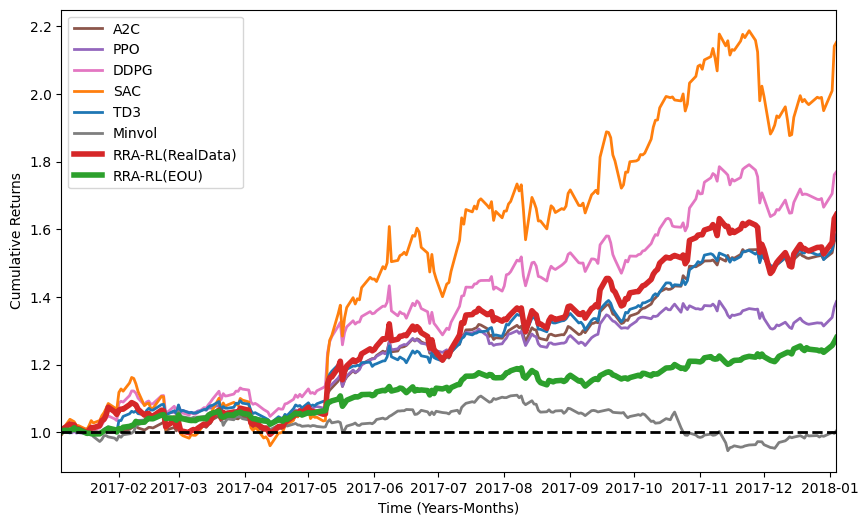

In [23]:
x = Cumulative_returns_daily_equal.index.values

a2c = Cumulative_returns_daily_drl_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)
minvol = Cumulative_returns_daily_drl_minvol
plt.plot(x, minvol, color='tab:gray', label='Minvol', linewidth =2.0)

"""
below is the cumumlative return for RobustRL
"""
robustRLX075 = cumulative_returns_RobustRL_X075[np.argmax(cumulative_returns_RobustRL_X075[:,-1])]
plt.plot(x, robustRLX075, color='tab:red', label='RRA-RL(RealData)', linewidth =4.0)

robustRL075 = cumulative_returns_RobustRL_075[np.argmax(cumulative_returns_RobustRL_075[:,-1])]
plt.plot(x, robustRL075, color='tab:green', label='RRA-RL(EOU)', linewidth =4.0)

#plt.title("Performance Comparison under Bull Market (with P=0.75)")
plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_max0.png',bbox_inches='tight')

#### This is the worst case run

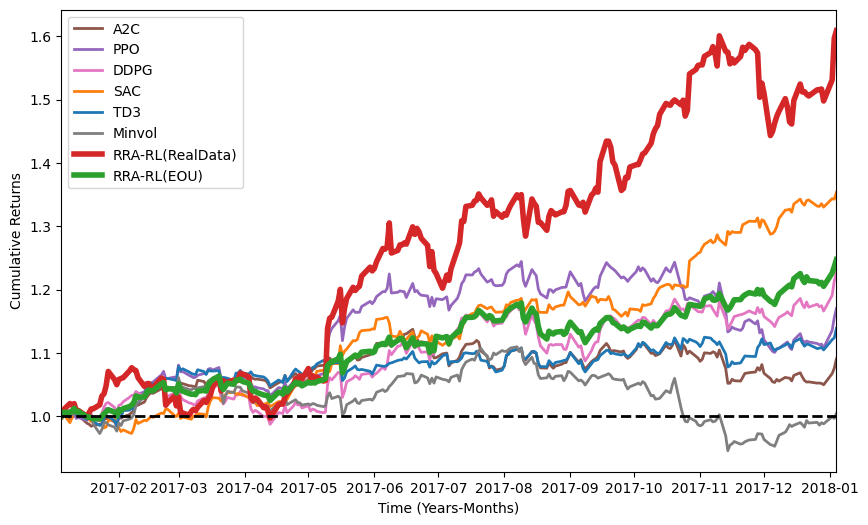

In [24]:
x = Cumulative_returns_daily_equal.index.values

a2c = Cumulative_returns_daily_drl_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)
minvol = Cumulative_returns_daily_drl_minvol
plt.plot(x, minvol, color='tab:gray', label='Minvol', linewidth =2.0)

robustRLX075 = cumulative_returns_RobustRL_X075[np.argmin(cumulative_returns_RobustRL_X075[:,-1])]
plt.plot(x, robustRLX075, color='tab:red', label='RRA-RL(RealData)', linewidth =4.0)

robustRL075 = cumulative_returns_RobustRL_075[np.argmin(cumulative_returns_RobustRL_075[:,-1])]
plt.plot(x, robustRL075, color='tab:green', label='RRA-RL(EOU)', linewidth =4.0)


plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_min0.png',bbox_inches='tight')

### Average Case Run

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


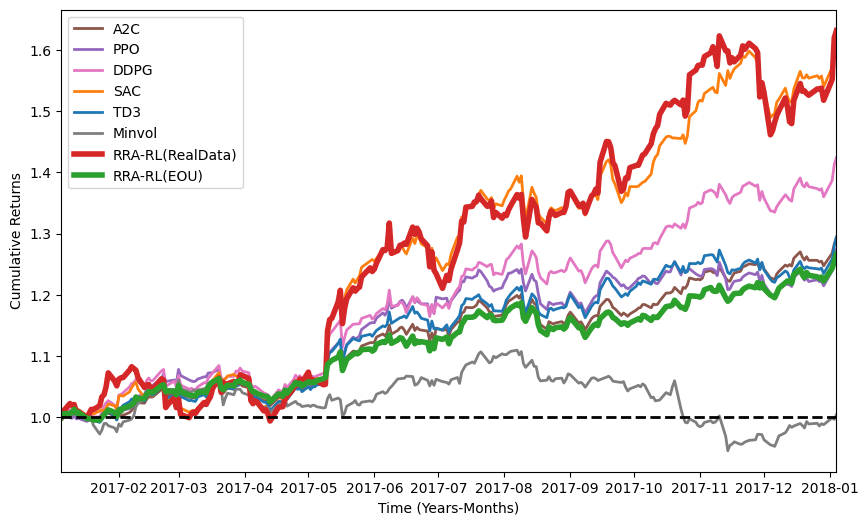

In [26]:
x = Cumulative_returns_daily_equal.index.values

a2c = np.mean(Cumulative_returns_daily_drl_a2c, axis=0)
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = np.mean(Cumulative_returns_daily_drl_ppo, axis=0)
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = np.mean(Cumulative_returns_daily_drl_ddpg, axis=0)
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = np.mean(Cumulative_returns_daily_drl_sac, axis=0)
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = np.mean(Cumulative_returns_daily_drl_td3, axis=0)
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)
minvol = Cumulative_returns_daily_drl_minvol
plt.plot(x, minvol, color='tab:gray', label='Minvol', linewidth =2.0)

robustRLX075 = np.mean(cumulative_returns_RobustRL_X075, axis=0)
plt.plot(x, robustRLX075, color='tab:red', label='RRA-RL(RealData)', linewidth =4.0)

robustRL075 = np.mean(cumulative_returns_RobustRL_075, axis=0)
plt.plot(x, robustRL075, color='tab:green', label='RRA-RL(EOU)', linewidth =4.0)


plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_min0.png',bbox_inches='tight')

### Load 5 Models' Allocation Policies

In [27]:
bull_validation_dir = '/content/gdrive/MyDrive/Colab/RRA_RL/Validation_Data/Bull/Weights/'

portfolio_weights_a2c = np.load(bull_validation_dir + 'New_WT_five_a2c.npy')
portfolio_weights_ppo = np.load(bull_validation_dir + 'New_WT_five_ppo.npy')
portfolio_weights_ddpg = np.load(bull_validation_dir + 'New_WT_five_ddpg.npy')
portfolio_weights_sac = np.load(bull_validation_dir + 'New_WT_five_sac.npy')
portfolio_weights_td3 = np.load(bull_validation_dir + 'New_WT_five_td3.npy')

In [28]:
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

# RRA-RL
portfolio_weights_RRA = allocationX075[np.argmax(cumulative_returns_RobustRL_X075[:,-1])]
return_stocks_RRA = np.sum(return_stocks.multiply(portfolio_weights_RRA[:-1]), axis=1)

portfolio_weights_EOU = allocation075[np.argmax(cumulative_returns_RobustRL_075[:,-1])]
return_stocks_EOU = np.sum(return_stocks.multiply(portfolio_weights_EOU[:-1]), axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

## Metrics

In [29]:
import pyfolio

/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [30]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_ppo, set_context=False)

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2017-01-05
End date,2018-01-04
Total months,12
,Backtest
Annual return,49.5%
Cumulative returns,49.5%
Annual volatility,15.6%
Sharpe ratio,2.65
Calmar ratio,9.43
Stability,0.95
Max drawdown,-5.3%


AttributeError: ignored

In [31]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_a2c, set_context=False)

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2017-01-05
End date,2018-01-04
Total months,12
,Backtest
Annual return,60.0%
Cumulative returns,60.0%
Annual volatility,16.6%
Sharpe ratio,2.92
Calmar ratio,10.30
Stability,0.96
Max drawdown,-5.8%


AttributeError: ignored

In [32]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_ddpg, set_context=False)

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2017-01-05
End date,2018-01-04
Total months,12
,Backtest
Annual return,71.3%
Cumulative returns,71.3%
Annual volatility,21.6%
Sharpe ratio,2.60
Calmar ratio,9.42
Stability,0.93
Max drawdown,-7.6%


AttributeError: ignored

In [33]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_sac, set_context=False)

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2017-01-05
End date,2018-01-04
Total months,12
,Backtest
Annual return,106.6%
Cumulative returns,106.6%
Annual volatility,39.5%
Sharpe ratio,2.03
Calmar ratio,6.23
Stability,0.89
Max drawdown,-17.1%


AttributeError: ignored

In [34]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_td3, set_context=False)

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2017-01-05
End date,2018-01-04
Total months,12
,Backtest
Annual return,19.2%
Cumulative returns,19.2%
Annual volatility,15.5%
Sharpe ratio,1.21
Calmar ratio,2.28
Stability,0.74
Max drawdown,-8.4%


AttributeError: ignored

In [37]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_RRA, set_context=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2017-01-05
End date,2018-01-04
Total months,12
,Backtest
Annual return,64.3%
Cumulative returns,64.3%
Annual volatility,23.3%
Sharpe ratio,2.25
Calmar ratio,6.47
Stability,0.92
Max drawdown,-9.9%


AttributeError: ignored

In [38]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_EOU, set_context=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2017-01-05
End date,2018-01-04
Total months,12
,Backtest
Annual return,27.9%
Cumulative returns,27.9%
Annual volatility,10.3%
Sharpe ratio,2.45
Calmar ratio,6.18
Stability,0.95
Max drawdown,-4.5%


AttributeError: ignored